# Data Exploration on Ford GoBike System Data
## by Isaac Aboagye Ampem

## Introduction
> This data set captures information about 183412 individual bike trips made in a bike-sharing system covering the greater San Francisco Bay area in the month of February 2019.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from geopy.distance import geodesic as gd
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import style

%matplotlib inline

In [2]:
# read dataset 
biking_data = pd.read_csv('fordgobike_dataset.csv')

In [3]:
# view first 5 entries
biking_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# view general information on dataset
biking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# view summary statistics on dataset
biking_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Structure of the dataset

The dataset has 183412 entries with 16 specification (columns). Nine (9) specifications have numerical values and Seven (7) have string or object type values. The columns are as follows ```duration_sec```, ```start_time```, ```end_time```, ```start_station_id```, ```start_station_name```, ```start_station_latitude```, ```start_station_longitude```, ```end_station_id```, ```end_station_name```, ```end_station_latitude ```, ```end_station_longitude```, ```bike_id```, ```user_type```, ```member_birth_year```, ```member_gender```, ```bike_share_for_all_trip```

### Main Feature(s) of Interest in the Dataset

I am most interested in finding out how ```duration_sec``` i.e. time taken to complete the trip varies with other features of the dataset such as ```member_birth_year``` i.e. age of member, ```member_gender``` etc. and bike trips per period of day.

### Features in the dataset I Think Will Help Support My Investigation into the Feature(s) of Interest

I belive the age of the members, their gender, the start and end points of the trip would greatly affect the trip duration.

## Feature Engineering

In [6]:
# make a copy of dataset
df= biking_data.copy()

In [7]:
# assign appropriate data types to features in the dataset
df = df.astype({'start_time':'datetime64[ns]', 'end_time':'datetime64[ns]', 'user_type':'category', 
                    'start_station_id':'str', 'end_station_id':'str', 'bike_id':'str', 'member_birth_year':'float'})

In [8]:
# check changes have been effected
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [9]:
# create new column for start month
df['start_month'] = df['start_time'].dt.month
# create new column for day of week
df['day_of_week']  = df['start_time'].dt.weekday
# create new column for hour biking was started
df['time_of_day'] = df['start_time'].dt.hour

In [10]:
# create a dictionary to assign day number to day names
days = {0:'Mon' , 1:'Tues', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'}
# map day names to day numbers in the week_day column
df['day_of_week'] = df['day_of_week'].map(days)
# create a dictionary to assign month number to month names
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 
         9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
# map month names to month numbers in the start_month column
df['start_month'] = df['start_month'].map(months)

In [11]:
# compute start and end hours
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

In [12]:
# compute number of unique months in which bike trips were started
df['start_time'].dt.month.nunique()

1

Comment

    All bike trips were in a single month

In [13]:
# compute number of unique months in which bike trips were ended
df['end_time'].dt.month.nunique()

2

Comment

    All bike trips ending is spread across two months/

In [14]:
# check if all bike trips started and ended in the same month
(df['start_time'].dt.month == df['end_time'].dt.month).value_counts()

True     183396
False        16
dtype: int64

Comment

    There are only sixteen (16) instances where a bike trip was started in one month and ended in the following month

In [15]:
# confirm all changes and added features have been effected
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,day_of_week,time_of_day,start_hour,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,Feb,Thur,17,17,8
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,2535,Customer,NaN,NaN,No,Feb,Thur,18,18,6
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,Feb,Thur,12,12,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,Feb,Thur,17,17,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,Feb,Thur,23,23,0


In [16]:
# create a list to categorize hours in which trips were started
hours = [-1,3,6,9,12,16,18,21,24]
# create a list of corresponding names to be assigned to periods of the day a strip was started
hr_def = ['midnight', 'dawn', 'morning', 'late morning', 'afternoon', 'late afetrnoon', 'evening', 'late evening']

[Ref: periods of day](https://wgntv.com/weather/how-do-you-define-daytime-and-evening-times-in-a-weather-forecast/)

In [17]:
# cut time_of_day column into bins uses the hours list and assign respective labels for each bin from lists above
df['time_of_day'] = pd.cut(df['time_of_day'], hours, labels=hr_def)

In [18]:
# view a sample of the dataset to confirm changes have been effected
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,day_of_week,time_of_day,start_hour,end_hour
70015,1050,2019-02-19 18:32:45.414,2019-02-19 18:50:15.484,126.0,Esprit Park,37.761634,-122.390648,118.0,Eureka Valley Recreation Center,37.759177,...,5469,Customer,1989.0,Male,No,Feb,Tues,late afetrnoon,18,18
87500,1198,2019-02-17 07:46:42.185,2019-02-17 08:06:40.572,134.0,Valencia St at 24th St,37.752428,-122.420628,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,...,5946,Subscriber,1987.0,Male,No,Feb,Sun,morning,7,8
108867,824,2019-02-12 21:19:18.398,2019-02-12 21:33:03.359,107.0,17th St at Dolores St,37.763015,-122.426497,60.0,8th St at Ringold St,37.774520,...,5479,Subscriber,1985.0,Female,No,Feb,Tues,evening,21,21
183212,679,2019-02-01 06:29:10.900,2019-02-01 06:40:30.764,285.0,Webster St at O'Farrell St,37.783521,-122.431158,5.0,Powell St BART Station (Market St at 5th St),37.783899,...,5268,Subscriber,NaN,NaN,No,Feb,Fri,dawn,6,6
56628,1391,2019-02-21 08:38:34.103,2019-02-21 09:01:46.007,377.0,Fell St at Stanyan St,37.771917,-122.453704,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,...,6484,Subscriber,1972.0,Male,No,Feb,Thur,morning,8,9
116856,587,2019-02-12 07:02:52.980,2019-02-12 07:12:40.065,311.0,Paseo De San Antonio at 2nd St,37.333798,-121.886943,312.0,San Jose Diridon Station,37.329732,...,2742,Subscriber,1974.0,Male,No,Feb,Tues,morning,7,7
37783,341,2019-02-23 13:25:54.530,2019-02-23 13:31:36.520,285.0,Webster St at O'Farrell St,37.783521,-122.431158,74.0,Laguna St at Hayes St,37.776435,...,5250,Subscriber,1988.0,Female,No,Feb,Sat,afternoon,13,13
147680,826,2019-02-07 07:21:55.760,2019-02-07 07:35:42.618,132.0,24th St at Chattanooga St,37.751819,-122.426614,63.0,Bryant St at 6th St,37.775910,...,5159,Subscriber,1964.0,Male,No,Feb,Thur,morning,7,7
59750,415,2019-02-20 19:35:56.226,2019-02-20 19:42:51.678,92.0,Mission Bay Kids Park,37.772301,-122.393028,130.0,22nd St Caltrain Station,37.757288,...,4988,Subscriber,1993.0,Male,No,Feb,Wed,evening,19,19
4404,1188,2019-02-28 15:47:29.090,2019-02-28 16:07:17.190,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,29.0,O'Farrell St at Divisadero St,37.782405,...,4712,Customer,1997.0,Female,No,Feb,Thur,afternoon,15,16


### Computing Distance
####  Approach 1  Using Haversine Formula
Kept here for future reference

In [19]:
# #Define function to calculate distance travelled using Haversine Formula
# from math import radians, cos, sin, asin, sqrt 
# def distance(lat_1, lat_2, lon_1, lon_2): 
      
#     # radians which converts from degrees to radians. 
#     lon_1 = radians(lon_1) 
#     lon_2 = radians(lon_2) 
#     lat_1 = radians(lat_1) 
#     lat_2 = radians(lat_2) 
       
#     # Haversine formula  
#     dlon = lon_2 - lon_1  
#     dlat = lat_2 - lat_1 
#     a = sin(dlat / 2)**2 + cos(lat_1) * cos(lat_2) * sin(dlon / 2)**2
  
#     c = 2 * asin(sqrt(a))  
     
#     # Radius of earth in kilometers. Use 3956 for miles 
#     r = 6371
#     dist = c * r
       
#     # calculate the result 
#     return(dist)

In [20]:
# df_copy = df.copy()

In [21]:
# df_copy['dist_km'] = df_copy.apply(lambda x: distance(x['start_station_latitude'], x['end_station_latitude'],
#                                                               x['start_station_longitude'],x['end_station_longitude']), axis=1)

In [22]:
# df_copy.sample(3)

In [23]:
# df_copy['dist_miles'] = df_copy['dist_km'] * 0.612371

#### Approach 2 Using ```geopy.distance.geodesic```

In [24]:
# convert start and end location coordinates to strings of longitude and latitude separated by a comma
df['start_cord'] = df['start_station_latitude'].map(str) +  ', ' + df['start_station_longitude'].map(str)
df['end_cord'] = df['end_station_latitude'].map(str) +  ', ' + df['end_station_longitude'].map(str)

In [25]:
# confirm change is effected from the code above
df.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_month,day_of_week,time_of_day,start_hour,end_hour,start_cord,end_cord
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,Feb,Thur,late afetrnoon,17,8,"37.7896254, -122.400811","37.794231, -122.402923"
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,...,NaN,NaN,No,Feb,Thur,late afetrnoon,18,6,"37.791464, -122.391034","37.77588, -122.39317"


In [26]:
# convert each start cordinate into tuples and append to an empty list called start_point
start_point = []
for i in df['start_cord']:
    cordinates = tuple(map(float, i.split(', ')))
    start_point.append(cordinates)

In [27]:
# convert each end cordinate into a tuple and append to an empty list call end_point
end_point = []
for i in df['end_cord']:
    cordinates_2 = tuple(map(float, i.split(', ')))
    end_point.append(cordinates_2)

In [28]:
# assign lists of tuple of start and end coordinates to star and end coordinate columns of the datasets
df['start_cord'] = start_point
df['end_cord'] = end_point

In [29]:
# concatenate tyhe start location coordinates to that of the end location separated by a comma
df['start_end_cord'] = df['start_cord'].map(str) +  ' , ' + df['end_cord'].map(str)

In [30]:
# view sample
df.start_end_cord[0]

'(37.7896254, -122.400811) , (37.794231, -122.402923)'

In [31]:
# convert the set of start and end coordinates to a list
df['coordinates'] = df['start_end_cord'].str.split(' , ')

In [32]:
# view sample of coordinates 
df.coordinates[0]

['(37.7896254, -122.400811)', '(37.794231, -122.402923)']

In [33]:
# convert list of coordinates to a tuple of tuples
all_cord = []
for cord in df.coordinates:
    cord_float = tuple(float(i) for i in cord[0].strip("()").split(',')) , tuple(float(j) for j in cord[1].strip("()").split(','))
    all_cord.append(cord_float)

In [34]:
# view sample
all_cord[0]

((37.7896254, -122.400811), (37.794231, -122.402923))

In [35]:
# test distance computation for a single set of coordinates in kilometers
gd(all_cord[3][0], all_cord[3][1]).km

0.26089587406901243

In [36]:
# loop over all coordinates and compute their respective distances in kilometers
distance = []
for i in all_cord:
    dist = round(gd(i[0], i[1]).km, 2)
    distance.append(dist)

Above code takes a bit of time to run. Be patient

In [37]:
# view list of calculated distances
distance

[0.54,
 1.74,
 2.71,
 0.26,
 2.41,
 3.33,
 2.03,
 4.53,
 4.53,
 3.66,
 0.98,
 1.62,
 4.77,
 0.87,
 1.22,
 0.79,
 2.32,
 2.21,
 1.75,
 0.0,
 1.32,
 1.06,
 2.75,
 0.87,
 1.05,
 1.5,
 1.31,
 0.0,
 2.34,
 2.34,
 0.46,
 0.76,
 1.4,
 2.08,
 0.0,
 1.02,
 0.44,
 0.95,
 3.75,
 1.09,
 1.29,
 0.72,
 1.31,
 0.37,
 1.87,
 2.84,
 0.46,
 0.93,
 1.47,
 0.77,
 3.57,
 1.69,
 2.56,
 0.0,
 0.97,
 0.0,
 0.0,
 1.07,
 0.4,
 0.0,
 0.0,
 2.97,
 1.38,
 0.96,
 2.41,
 2.21,
 1.14,
 2.57,
 0.4,
 0.94,
 0.88,
 1.64,
 0.0,
 2.96,
 0.0,
 0.0,
 0.0,
 0.73,
 0.99,
 2.25,
 0.84,
 0.93,
 0.33,
 4.14,
 3.44,
 0.23,
 0.46,
 2.85,
 1.65,
 2.48,
 0.48,
 0.87,
 5.67,
 1.16,
 2.02,
 2.74,
 0.88,
 0.0,
 1.64,
 1.41,
 2.86,
 0.46,
 1.38,
 1.16,
 1.92,
 0.51,
 1.27,
 1.55,
 1.55,
 2.77,
 1.34,
 1.39,
 1.47,
 0.46,
 2.05,
 1.26,
 1.26,
 1.2,
 0.52,
 1.05,
 2.19,
 1.59,
 2.47,
 1.79,
 0.7,
 2.27,
 2.63,
 0.64,
 0.26,
 2.85,
 2.0,
 2.48,
 3.88,
 1.68,
 2.83,
 1.86,
 1.2,
 0.73,
 2.27,
 0.7,
 0.67,
 1.56,
 0.87,
 1.2,
 4.93,
 1.63,
 

In [38]:
# create a new distance column in the dataset
df['distance_covered_km'] = distance

In [39]:
# compute age of each biker
member_age = []
for age in df['member_birth_year']:
    age = 2019 - age
    member_age.append(age)

In [40]:
# create new column called age in the dataset
df['age'] = member_age

In [41]:
# drop rows with null entries
df.dropna(axis=0, inplace=True)

In [42]:
# check for nulls in dataset
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
start_month                0
day_of_week                0
time_of_day                0
start_hour                 0
end_hour                   0
start_cord                 0
end_cord                   0
start_end_cord             0
coordinates                0
distance_covered_km        0
age                        0
dtype: int64

In [43]:
# view column indexes to help with dropping unwanted features
for index, col_name in enumerate(df):
    print(index, col_name)

0 duration_sec
1 start_time
2 end_time
3 start_station_id
4 start_station_name
5 start_station_latitude
6 start_station_longitude
7 end_station_id
8 end_station_name
9 end_station_latitude
10 end_station_longitude
11 bike_id
12 user_type
13 member_birth_year
14 member_gender
15 bike_share_for_all_trip
16 start_month
17 day_of_week
18 time_of_day
19 start_hour
20 end_hour
21 start_cord
22 end_cord
23 start_end_cord
24 coordinates
25 distance_covered_km
26 age


In [44]:
# drop unwanted columns from the dataset
df.drop(df.columns[[21,22,23,24]], axis=1, inplace=True)

In [45]:
# view generat information on resulting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [46]:
# save copy of clean data
df.to_csv('clean_bikeshare_data.csv')

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.

In [47]:
# import warnings library
import warnings
# ignore or suppress warnings
warnings.filterwarnings("ignore")

### Define Box Plot Function

In [48]:
# define function name and arguments
def my_box(data, title, x_label):
    # set figure size
    plt.figure(figsize=(7,4))
    # set style to use
    style.use('seaborn')
    # plot box chart
    sns.boxplot(x=data.astype('float'))
    # set x-axis label
    plt.xlabel(x_label, fontsize=15)
    # set chart title
    plt.title(title, fontsize= 25)
    # display chart
    plt.show()

#### Plot 1: Box Plot of Ages of Bikers

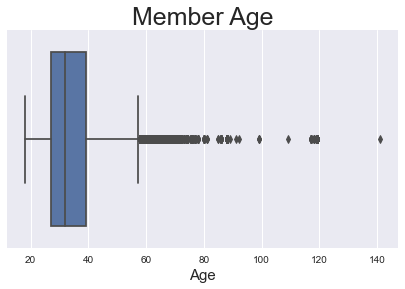

In [49]:
# plot ages of bikers
my_box(df['age'], 'Member Age', 'Age')

Comment

    The plot reveals the age of bikers have some outliers

#### Plot 2: Box Plot of Trimmed Ages of Bikers 70 Years and Less

In [50]:
# trim the dataset to remove bikers 70 years and above
df_new = df[df.age <=70]

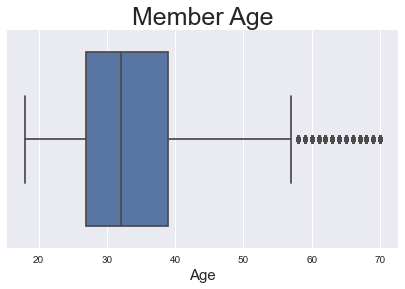

In [51]:
# plot age of resultant dataset
my_box(df_new['age'], 'Member Age', 'Age')

Comment

     Plots 5 and 6 reveal most bikers are below 40 years

#### Plot 3: Box Plot of Bikers Years of Birth

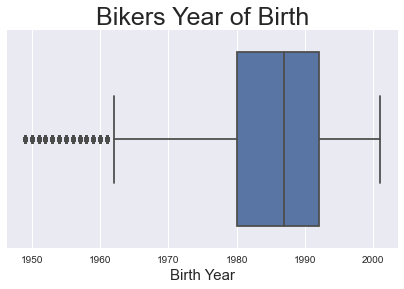

In [52]:
# plot bikers years of birth
my_box(df_new['member_birth_year'], 'Bikers Year of Birth', 'Birth Year')

Comment

    Plot 7 reveals greater percentage of bikers were born after 1980

#### Plot 4: Histogram of Bikers Ages

In [53]:
# compute year in which the biking took place
df_new['end_time'].dt.year.unique()

array([2019], dtype=int64)

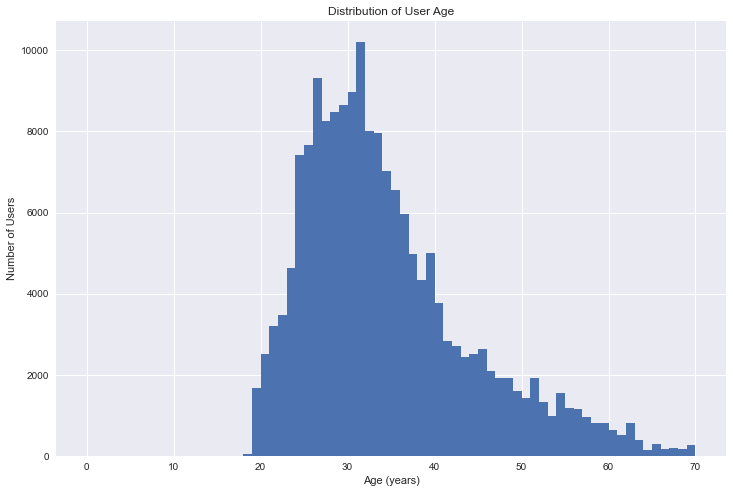

In [54]:
# set number of bins to use
bins = np.arange(0, df_new['age'].max()+1, 1)
# set figure size
plt.figure(figsize=[12, 8])
# plot histogram
plt.hist(data = df_new, x = 'age', bins = bins)
# set chart title
plt.title('Distribution of User Age')
# set x-axis label
plt.xlabel('Age (years)')
# set y-axis label
plt.ylabel('Number of Users')
# display chart
plt.show()

Comment

    Bikers Ages Distribution is Right Skewed

#### Plot 5: Pie Chart of Gender of Bikers

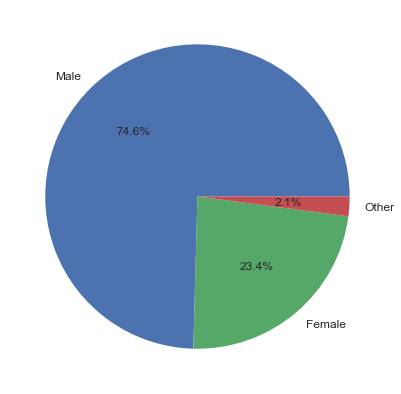

In [55]:
# compute counts of bikers per gender
gender_counts = df_new['member_gender'].value_counts()
# set figure size
plt.figure(figsize=(12,7))
# plot pie chart of gender of bikers
plt.pie(gender_counts, labels= gender_counts.index, autopct='%1.1f%%', textprops={'fontsize':12}); # add wedgeprops = {'width' : 0.4} to get a doughnut plot

Comment

    Most bikers were males

### Define Function for to Plot Bar Charts

In [56]:
# select color color to use for all bars
color = sns.color_palette()[0]

# define plot function
def countplot(x, order, x_label, y_label, title):   
    # set style to use
    style.use('seaborn')
    # set figure size
    plt.figure(figsize=(12,6))
    # plot bar chart using seaborn's countplot function
    sns.countplot(x=x, color=color, order=order)
    # set x-axis label
    plt.xlabel(x_label, fontsize=20)
    # set y-axis label
    plt.ylabel(y_label, fontsize=20)
    # set chart title
    plt.title(title, fontsize=25)

#### Plot 6: Bar Chart of User Types

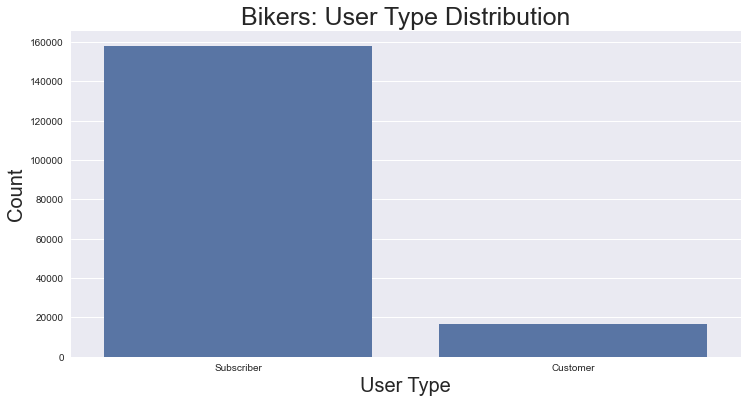

In [57]:
# set order to use
order = ['Subscriber', 'Customer']
# call function to plot bar chart of genders of bikers
countplot(df_new['user_type'], order, 'User Type', 'Count', 'Bikers: User Type Distribution')

Comment

    A higher percentage of the bikers are subscribers

#### Plot 7: Bar Chart of Distribution of Days of Week on Which Bikers Started Their Trips

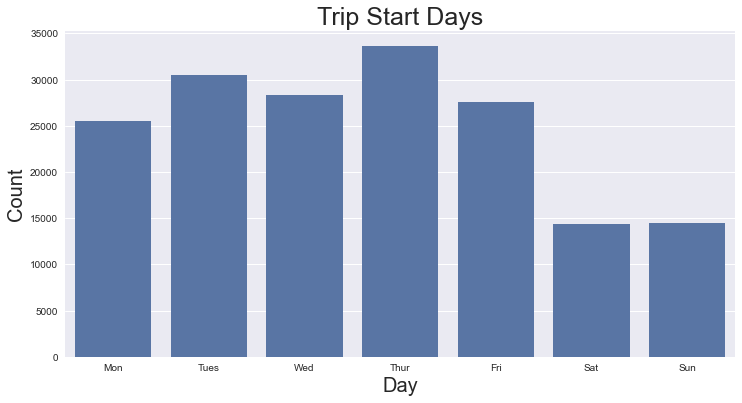

In [58]:
# define ordering of bars
day_order = ['Mon', 'Tues','Wed','Thur', 'Fri', 'Sat', 'Sun']
# call function to plot bar chart of days
countplot(df_new['day_of_week'], day_order, 'Day', 'Count', 'Trip Start Days')

Comment

    Here we can see more trips were done on weekdays relative to weekends

#### Plot 8: Bar Chart of Distribution of Period of Day in Which Biking Trips Were Started

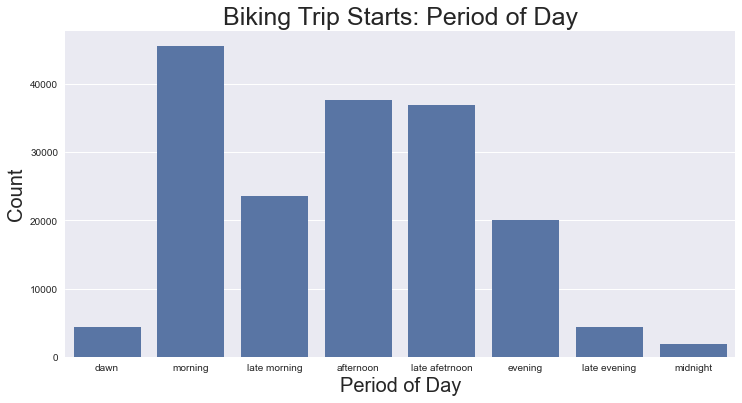

In [59]:
period_order = ['dawn', 'morning', 'late morning', 'afternoon', 'late afetrnoon', 'evening', 'late evening', 'midnight']
countplot(df_new['time_of_day'], period_order, 'Period of Day', 'Count', 'Biking Trip Starts: Period of Day')

Comment

    A greater percentage of trips where started during periods of broad light

### Define histogram Funtion to Plot Distibution of Trip Durations

In [60]:
def my_hist (data, hor, ver, x1, x2, y1, y2):
    # FIND BIN SIZE MATHEMATICALLY
    # find 3rd and 1st quartile
    q3, q1 = np.percentile(data, [75, 25])
    # compute interquartile range
    IQR = q3 - q1
    # compute bin size from the formular 2*IQR*(n^(-1/3)) where n is number of data entries
    binsize = 2* IQR * ((data.nunique())**(-1/3))
    print('Binsize = ' + str(round(binsize, 0)))
    # compute bins from
    bins = np.arange(0, data.max()+binsize, binsize)
    # set fig size
    plt.figure(figsize=(hor, ver))
    # plot histogram
    sns.histplot(x=data, bins= len(bins))
    # plot axis
    plt.axis([x1,x2,y1,y2])
    # show plot
    plt.show()


#### Plot 9: Distibution of Bike Trip Durations

Binsize = 57.0


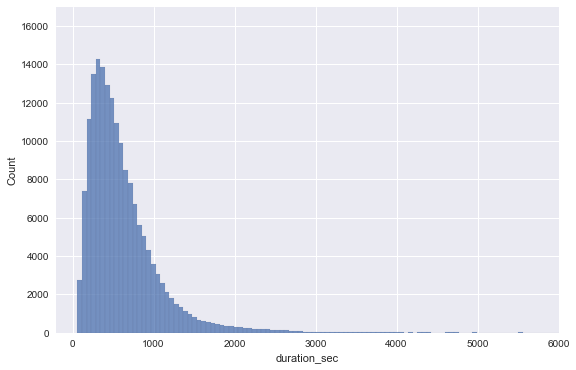

In [61]:
# call function to plot histogram of trip durations
my_hist(df_new['duration_sec'], 9, 6, -200, 6000, 0, 17000)

Comment

    Trip duration is right skewed

#### Plot 10: Log Transformation of Dsitribution of Trip Durations

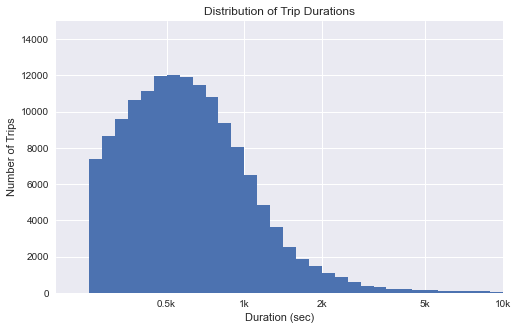

In [62]:
# define bin size
log_binsize = 0.05
# definen numer of bins
log_bins = 10 ** np.arange(2.4, np.log10(df_new['duration_sec'].max()) + log_binsize, log_binsize)
# set figure size
plt.figure(figsize=[8, 5])
# plot figure
plt.hist(data = df_new, x = 'duration_sec', bins = log_bins)
# set chart title
plt.title('Distribution of Trip Durations')
# set x-axis label
plt.xlabel('Duration (sec)')
# set y-axis label
plt.ylabel('Number of Trips')
# log-transform xcale
plt.xscale('log')
# set x-axis ticks
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], ['0.5k', '1k', '2k', '5k', '10k'])
# set x and y axes minimum and maximum
plt.axis([0, 10000, 0, 15000])
# display cahrt
plt.show();

Comment

       Greater number of trip durations are less than 2000 seconds (33 mins 20 sec). Number of bikers durations increases 
       from 0 to about 600 secs and declines gradually to near zero.

#### Plot 11: Distribution of Trip Start Hours

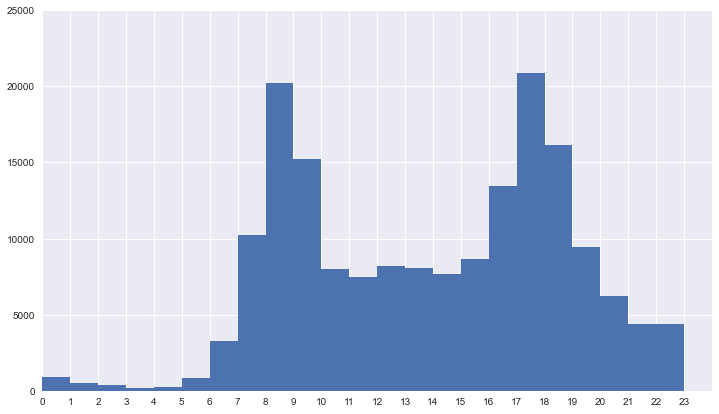

In [63]:
plt.figure(figsize=(12, 7))
bins = np.arange(0, df_new['start_hour'].max()+1, 1)
ticks = range(0,24,1)
plt.axis([0,24,0,25000])
plt.hist(df['start_hour'], bins = bins)
plt.xticks(ticks);

Comment

    Trip start times are concentrated between the hours of 7 am and 7 pm



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The age feature had outliers with ages above 80 years. Just wonder how and 80 years and above person could be riding a bicycle (hahaha...). I handled this by trimming the data to bikers with age 70 years and below.

> Most bike trips were started and end during the periods of the day with enough light (morning to late afternoon)

> As expected, most bike trips were on weekdays (Monday - Friday) and just a few on the weekends since those are the busy days of the week with a lot of commuting to and from work.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The plot of the duration was right skewed and pretty much squeezed, thus I performed a log transformation on the x-axis scale to help me get a better visual of the distribution.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Plot 12: Correlation Plot of Age and Trip Duration

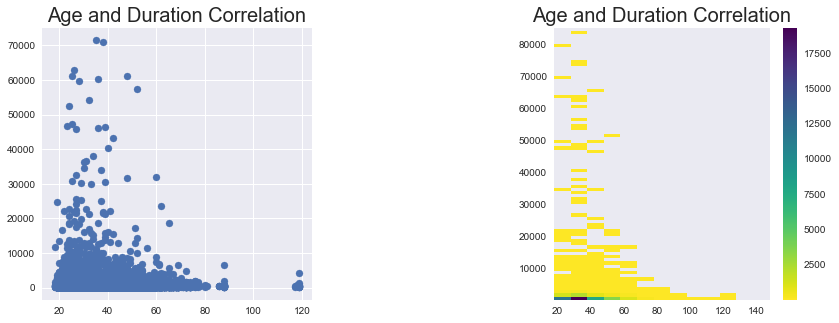

In [64]:
plt.figure(figsize=(14,5))
# set horizontal spacing between subplots
plt.subplots_adjust(wspace=0.9)
# choose style to use
style.use('seaborn')
# set location of firt plot
plt.subplot(1,2,1)
# plot scatter plot between age and trip duration
plt.scatter(df['age'].sample(50000),df['duration_sec'].sample(50000))
# set chart title
plt.title('Age and Duration Correlation', fontsize=20)

# set location of second plot
plt.subplot(1,2,2)
# define number of bins for x and y planes
x_bins = np.arange(18,141+10,10)
y_bins = np.arange(61, 84548 + 1000, 1000)
# plot histogram of feature of interest
plt.hist2d(data = df.sample(50000),x= 'age', y= 'duration_sec', cmin=0.5, cmap= 'viridis_r',
          bins = [x_bins, y_bins])
# set chart title
plt.title('Age and Duration Correlation', fontsize=20)
# plot color bar
plt.colorbar();

Comment

    It can be inferred from the plots above that mose riders are between ages 20 and about 45. Trimming subplot 2 for a 
    better view

#### Plot 13: Correlation Plot of Age and Trip Duration: Trimmed

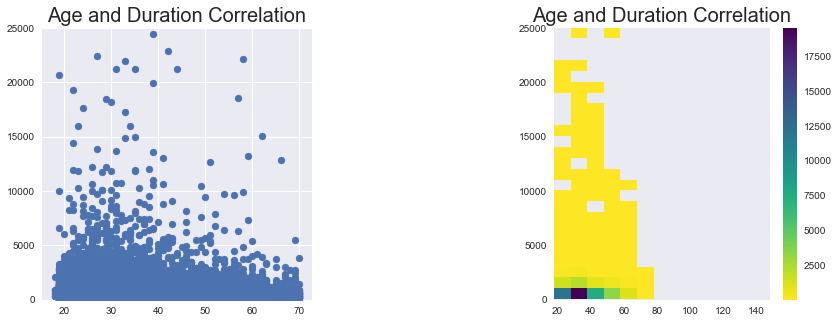

In [65]:
plt.figure(figsize=(14,5))
# set horizontal spacing between subplots
plt.subplots_adjust(wspace=0.9)
# choose style to use
style.use('seaborn')
# set location of firt plot
plt.subplot(1,2,1)
# plot scatter plot between age and trip duration
plt.scatter(df_new['age'].sample(50000),df_new['duration_sec'].sample(50000))
# set chart title
plt.ylim(0, 25000)
plt.title('Age and Duration Correlation', fontsize=20)

# set location of second plot
plt.subplot(1,2,2)
# define number of bins for x and y planes
x_bins = np.arange(18,141+10,10)
y_bins = np.arange(61, 84548 + 1000, 1000)
# plot histogram of feature of interest
plt.hist2d(data = df_new.sample(50000),x= 'age', y= 'duration_sec', cmin=0.5, cmap= 'viridis_r',
          bins = [x_bins, y_bins])
# set chart title
plt.title('Age and Duration Correlation', fontsize=20)
# trim y axis limits
plt.ylim(0, 25000)
# plot color bar
plt.colorbar();

Comment

    There exist a medium to strong correlation between age and trip duration for bikers between 20 and 40 years. These doing 
    about 1000 secs ride time
    
    Generally there is not a strong correlation between ages of bikers and their respective trip durations

#### Plot 14:  Box Plots of Age vrs User_Types and Gender

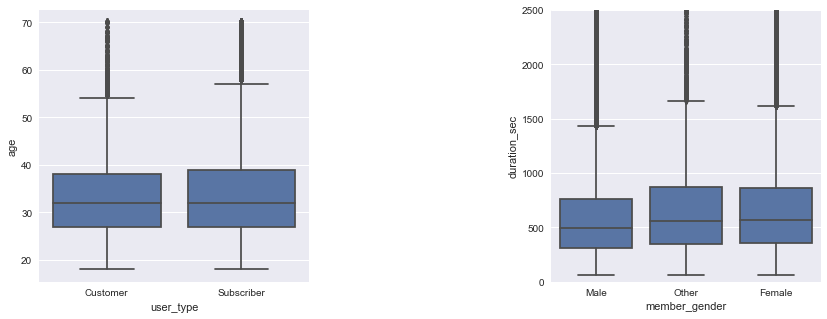

In [66]:
plt.figure(figsize=(14,5))
# set horizontal spacing between subplots
plt.subplots_adjust(wspace=0.9)
# choose style to use
style.use('seaborn')
# plot subplot 1
plt.subplot(1,2,1)
# define location of subplot 1
sns.boxplot(data = df_new, x='user_type', y= 'age', color=color)  #, inner=None)
# define location of subplot 2
plt.subplot(1,2,2)
# plot chart
sns.boxplot(data = df_new, x='member_gender', y= 'duration_sec', color=color)
# set duration limit for better view
plt.ylim(0, 2500); 

Comment

    Age distribution of subscribers is widely spread that customers
    
    Male bikers relatively have better trip durations (shorter times) than females and other gender groups

### Define Function for Box Plot of Two Variables

In [67]:
def bivarate_box_plot (data, x, y, color):
    plt.figure(figsize=(9,5))
    # set horizontal spacing between subplots
    plt.subplots_adjust(wspace=0.9)
    # choose style to use
    style.use('seaborn')
    # plot chart
    sns.boxplot(data = df, x=x, y= y, color=color);  #, inner=None)

#### Plot 15: Box Plot of Age of Bikers Per Days of Week

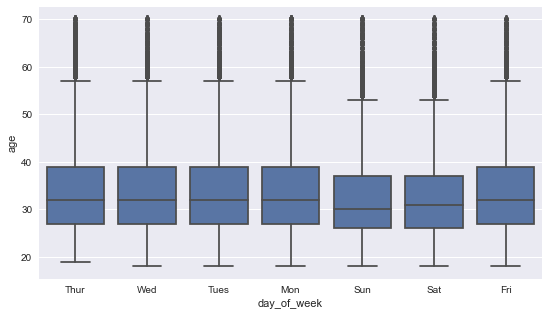

In [68]:
# call function to plot chart
bivarate_box_plot(df_new, df_new['day_of_week'], df_new['age'], color)

Comment

    Weekdays have similar distribution of bikers according to age. i.e. between 25 and 40 years. So is same for weekends.

#### Plot 16: Box Plot of Age of Bikers vrs Bike Sharing State (Yes or No)

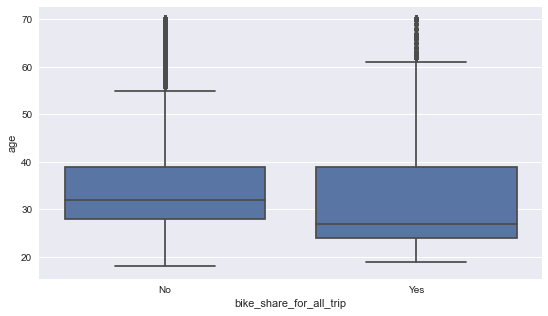

In [69]:
# call function to plot chart
bivarate_box_plot(df_new, df_new['bike_share_for_all_trip'], df['age'], color)
# set age limit to 70
# plt.ylim([0, 70]);

In [70]:
df.bike_share_for_all_trip.value_counts()

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

Comment

    More bikers share bikes than otherwise

#### Plot 17: Line Plot of Bikers Ages and Duration of Trip

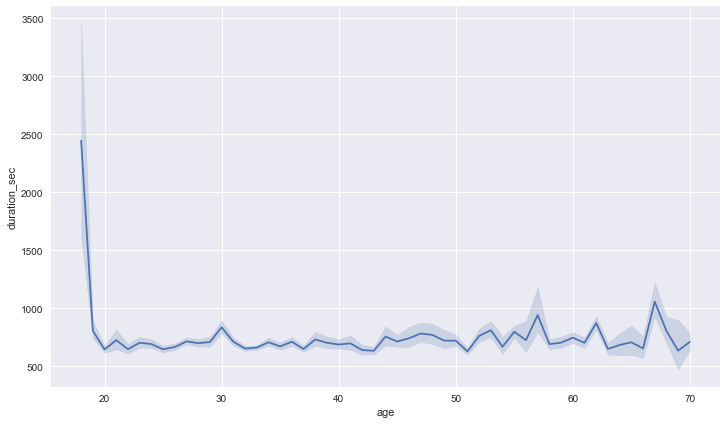

In [71]:
# set figure size
plt.figure(figsize=(12,7))
# plot chart
sns.lineplot(data = df_new, x= 'age', y= 'duration_sec', color=color);

Comment

    Inferring from the chart above, trip duration for all bikers 70 years or less is between about 600 and 1050 secs

#### Plot 18: Grid Plot of Age vrs Time of Day in which Trip was Started

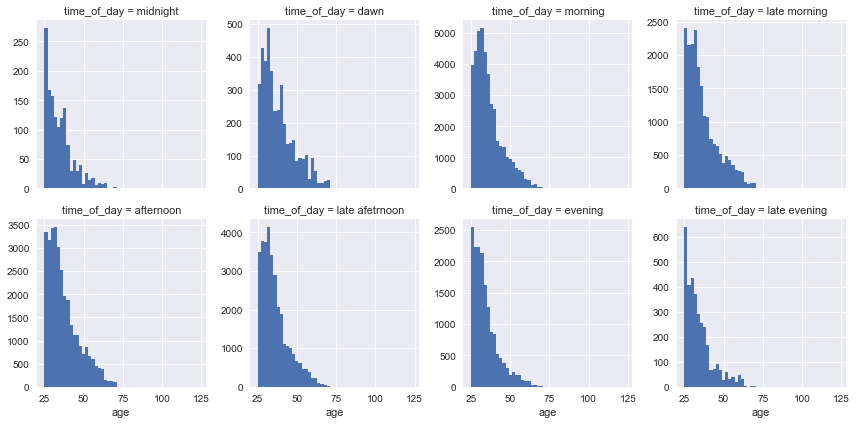

In [72]:
# define bins
bins = np.arange(25, 123+2,2)
# define column variables and maximum plots per row
g = sns.FacetGrid(data = df_new, col = 'time_of_day', col_wrap=4, sharey=False)
# define row variables and map to g bove
g.map(plt.hist, 'age', bins = bins);

Comment

    There are relatively more cycling activities between dawn and late afternoon than midnight, evening and late evening

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> More bikers share bikes than otherwise

> Trip duration for all bikers 70 years or less is between about 600 and 1050 secs

> Weekdays have similar distribution of bikers according to age. i.e. between 25 and 40 years. So is same for weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Subscribers have a wider distribution of bikers in terms of age than customers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### Plot 19: Heat Map of Datasets

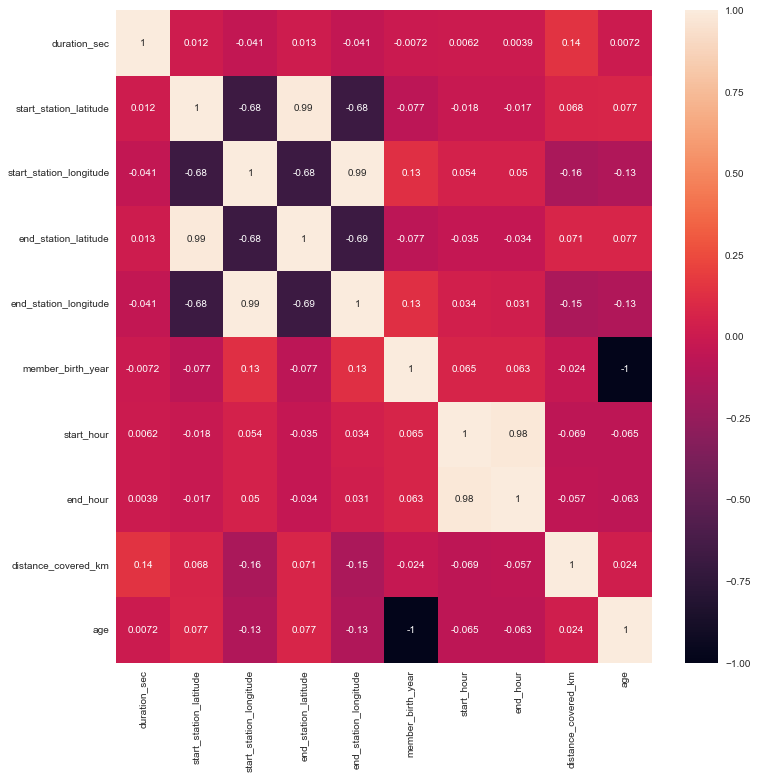

In [73]:
# set figure size
plt.figure(figsize=(12,12))
# plot heat map of numerical features in dataset
sns.heatmap(df_new.corr(method='pearson'), annot=True);

Comment

    There is little to no correlation between the features of the dataset

#### Plot 20: Regression Plot of Gender, Age and Duration

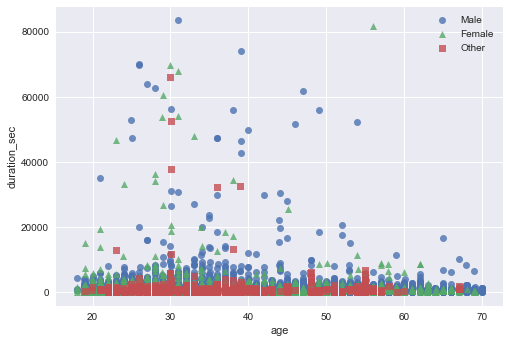

In [74]:
# Define Markers
gender_markers = [['Male', 'o'], ['Female', '^'], ['Other','s']]

# Loop over dataset to plot chart and assign respective markers to data points
for gender, marker in gender_markers:
    # plot based on sample from dataset
    plot_data = df_new.sample(50000)[df_new['member_gender']==gender]
    # plot regression chart
    sns.regplot(data = plot_data, x = 'age', y = 'duration_sec', x_jitter=0.04,
                fit_reg=False, marker=marker)
    # display legend
    plt.legend(['Male', 'Female', 'Other']);

Comment

    There is no clear correlation between the three variables

#### Plot 21: Scatter Plot of Start Hour, End Hour and Age

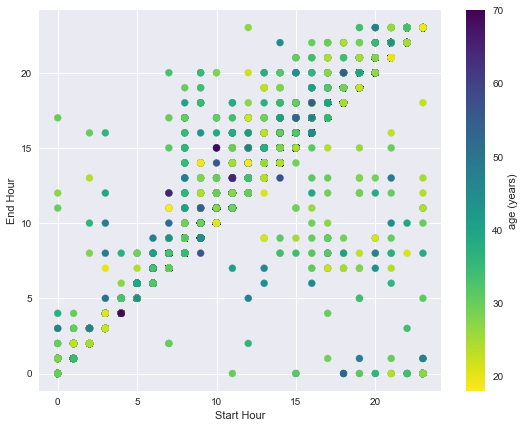

In [75]:
# set figure size
plt.figure(figsize=(9,7))
# plot scatter chart of three variables
plt.scatter(data = df_new, x= 'start_hour', y='end_hour', c='age', cmap='viridis_r')
# set x-axis label
plt.xlabel('Start Hour')
# set y-axis label
plt.ylabel('End Hour')
# plot color bar
plt.colorbar(label = 'age (years)');


# Alternative - Kept for future reference
# g = sns.FacetGrid(data = df.sample(50000), hue = 'day_of_week',
#                  size = 4, aspect=1.5, palette='viridis_r')
# g = g.map(sns.regplot, 'start_hour', 'age', x_jitter = 0.04, fit_reg = False);
# g.add_legend()


Comment

    There is a generally a strong correlation between start and end hours and age for member 50 years and above

#### Plot 22: Grid Plot of Day of Week, Age and Distance Covered

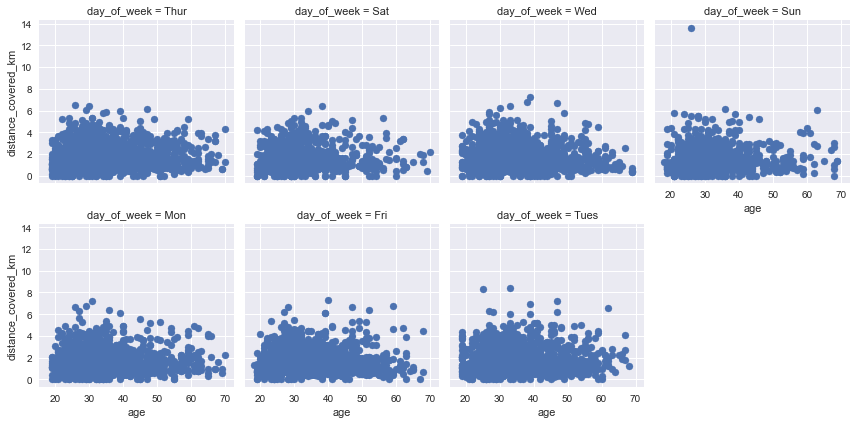

In [76]:
# create grid object g
g = sns.FacetGrid(data = df_new.sample(10000), col='day_of_week', col_wrap=4)
# plot scatter plot of age and distance and map to g
g.map(plt.scatter, 'age', 'distance_covered_km');

Comment

    There looks like an even spreadout on bikers and their respective trip durations across the days of the week

#### Plot 23: Grid Plot of Age, Day of Week, Time of Day and Distance Covered

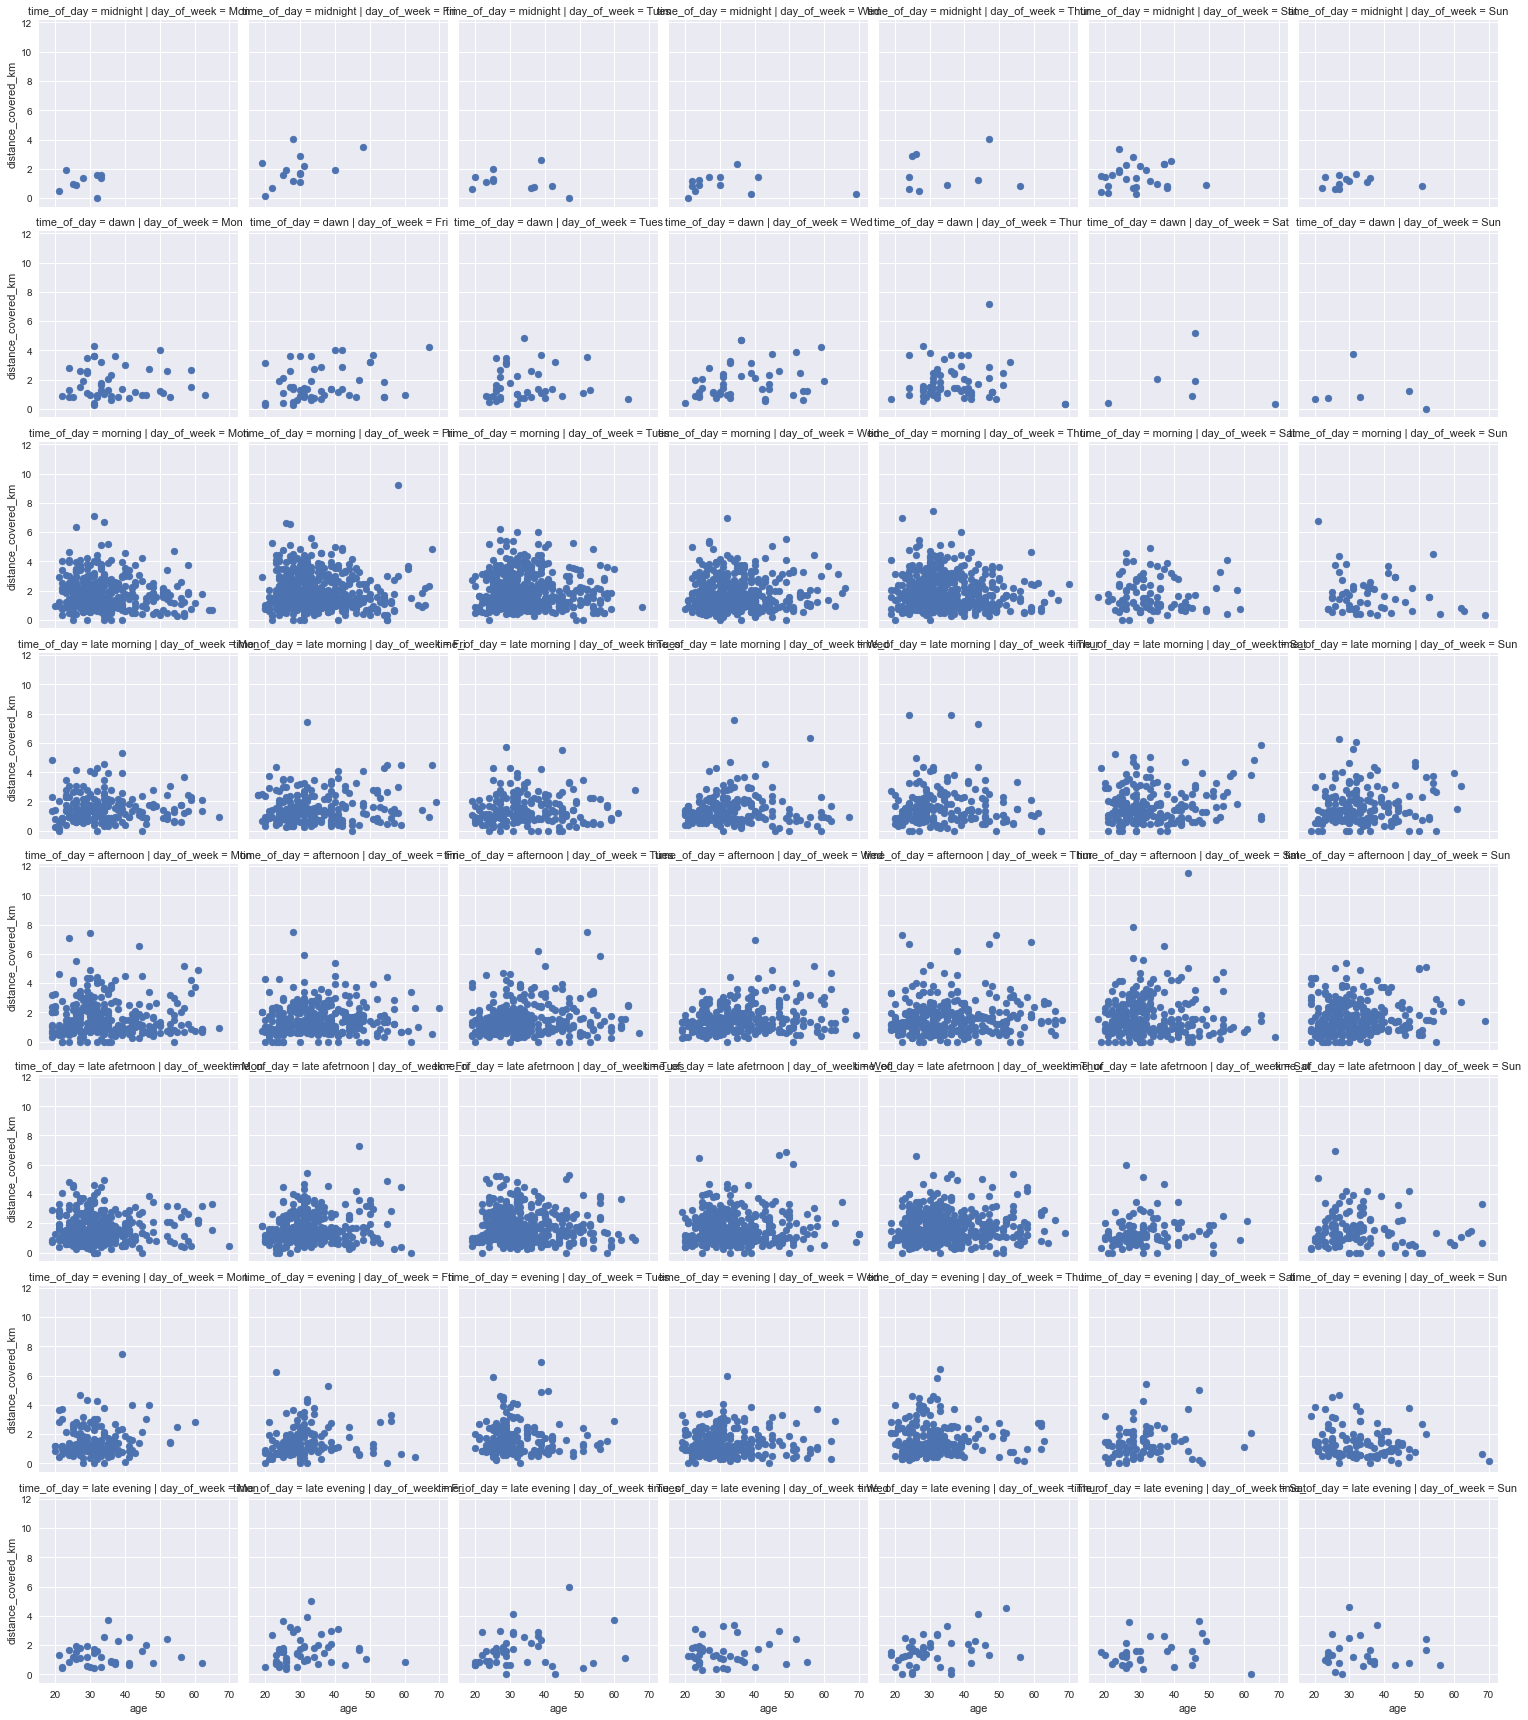

In [77]:
# define number of bins
bins = np.arange(12, 58+2, 2)
# creat facet grid of two variables and assign to obeject g
g = sns.FacetGrid(data = df_new.sample(10000), col='day_of_week', row='time_of_day')
# plot scatter plot of age and distance and map to g
g.map(plt.scatter, 'age', 'distance_covered_km');

Comment

    There is generally appreciable correlation between distance covered, age of bikers and the period of day.
    Most bikers below 60 years cover more distance from morning to late afternoon relative to other periods of the day and
    the age of members.

#### Plot 24: Plot of Age, Duration of Trip and Period of Day

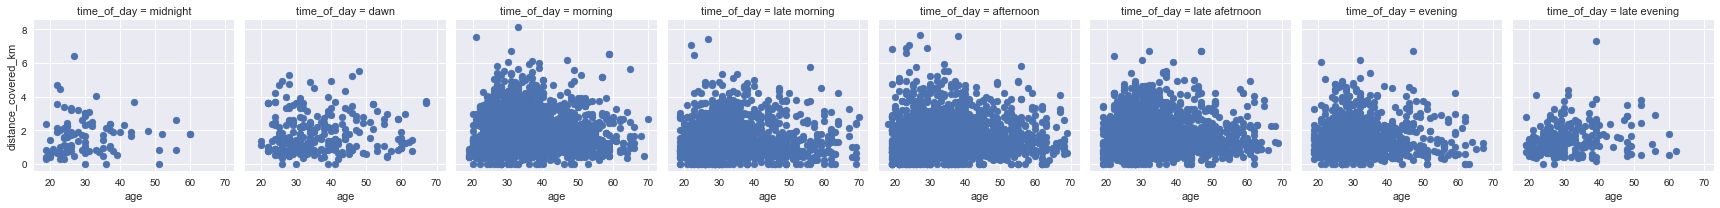

In [78]:
# define number of bins
bins = np.arange(12, 58+2, 2)
# creat facet grid of two variables and assign to obeject g
g = sns.FacetGrid(data = df_new.sample(10000), col='time_of_day')
# plot scatter plot of age and distance and map to g
g.map(plt.scatter, 'age', 'distance_covered_km');

 Comment
 
         Majority of bikers had their trips between morning and evening

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a strong correlation between the hour a trip was started and the hour in which it is ended
> There is little to no correlation between all other numeriacal variables in the dataset
> The period of day greatly impacts the number of bikers. The brighter periods of the day saw more bikers or bike trips than the darker periods of the day.

### Were there any interesting or surprising interactions between features?

> No. Normally, it is expected that people would be at home and resting from the evening till after dawn and the data analysis just confirmed that as very few bike trip were made during these periods of the day

## Conclusions
> The entire dataset provided captured trips made in the month of February 2019. It captured bikers as old as a 100 years and above an age range in which it would be unrealistic for an individual to be riding a bicycle. Thus, all information for bikers 71 years and over were considerd as outliers and removed from this analysis.

> The greater portion of bikers are males, followed by females and other gender groups including that which weren't declared.

> Generally majority of bikers complete their trips in 2000 seconds or less. i.e. approxiamate 33 mins or less, most distance is covered on the weekdays (Monday-Friday) and its by bikers aged between 20 - 40 from morning to late afternoons and there is medium to strong correlation between bikers 50 years and less who complete their trips in approximately 17 minutes or less but barely no correlation between age and durations for the other bikers completing their trips beyond approximately above 17 mins.